# References

- Data: https://github.com/mwaskom/seaborn-data
- API: http://seaborn.pydata.org/api.html
- Colors: 
    - https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
    - https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

# Scatterplot

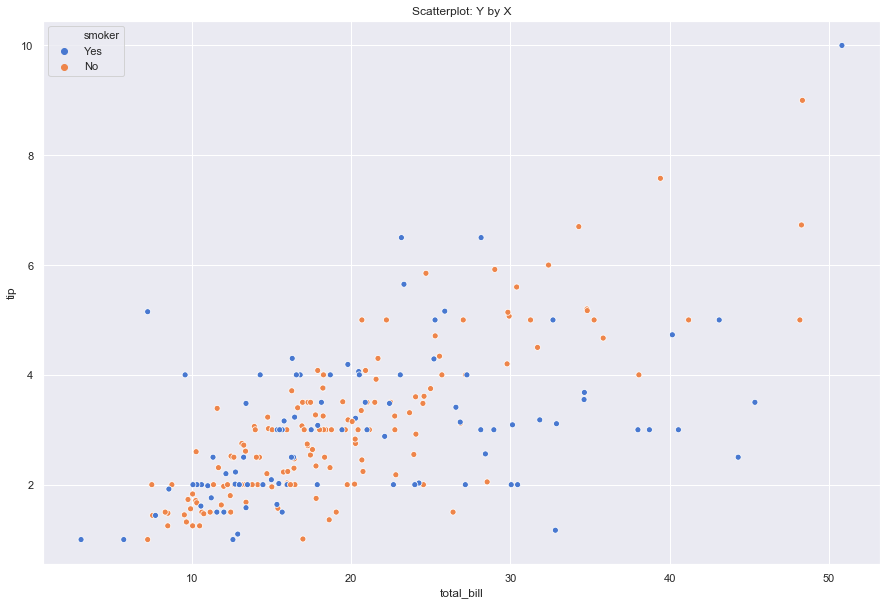

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("tips")

p = sns.scatterplot(x="total_bill", y="tip",            
            hue="smoker",
            # style="smoker",
            # size="size",
            palette = "muted",
            data=df);

plt.title("Scatterplot: Y by X")
plt.show(p)

# Facet Plot

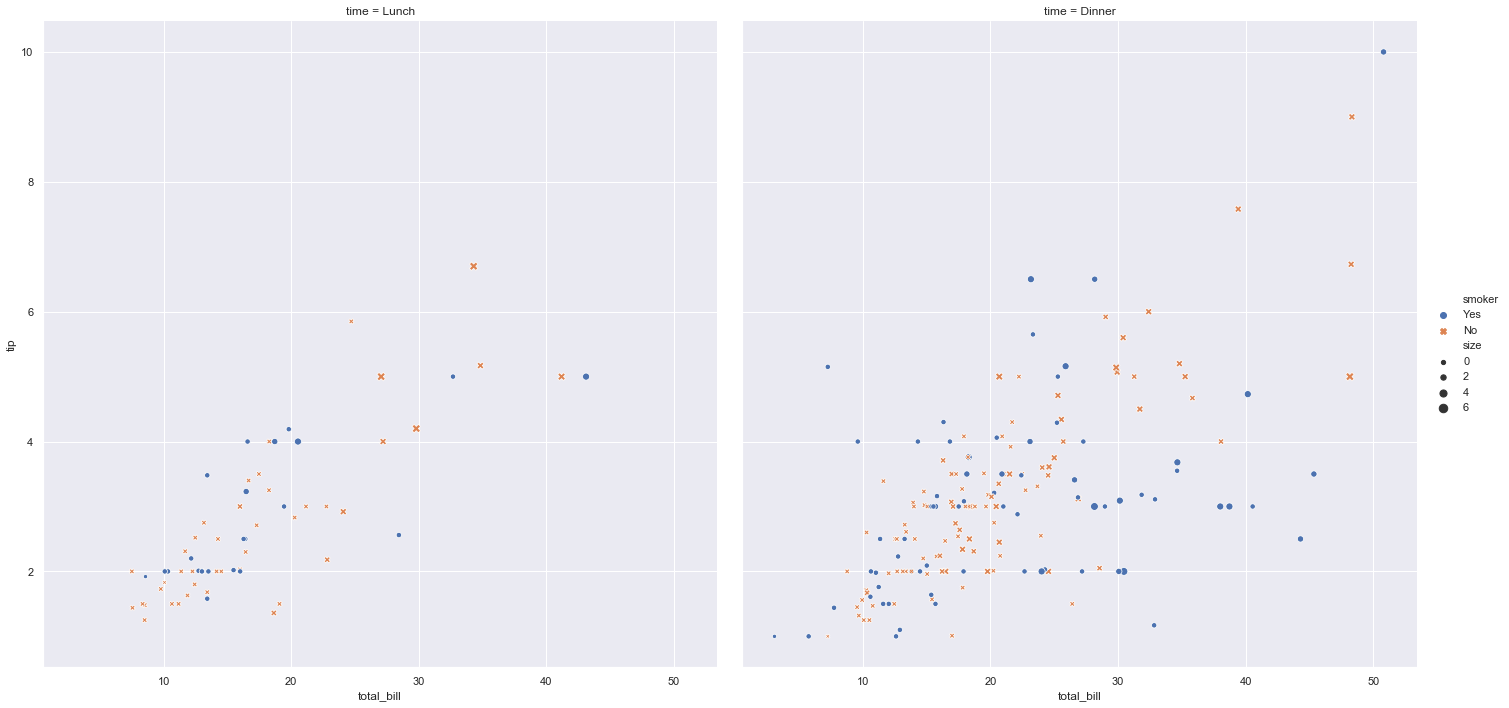

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = sns.load_dataset("tips")

p = sns.relplot(x="total_bill", y="tip", 
            col="time", 
            hue="smoker",
            style="smoker", 
            size="size", 
            height = 10,
            data=df);

plt.show(p)

# Line Plot

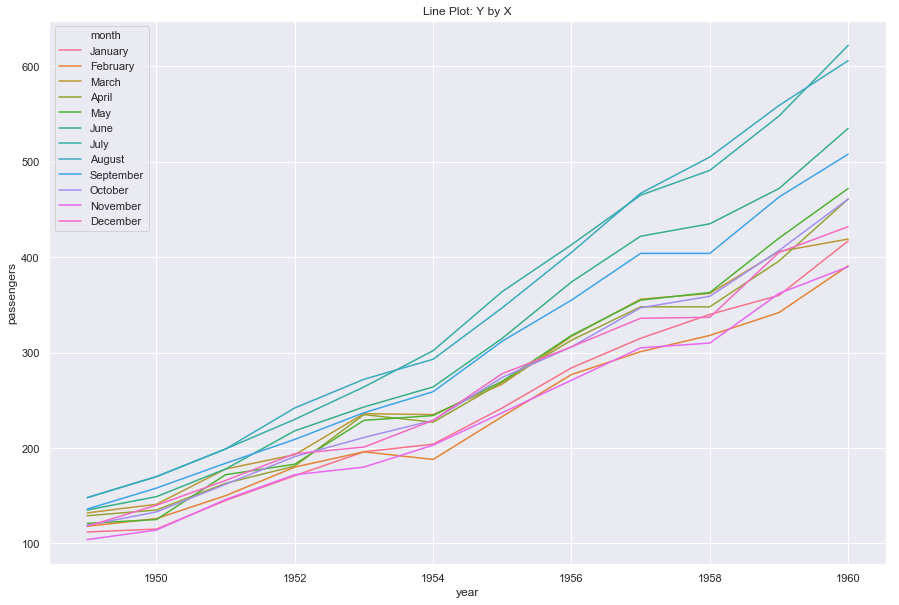

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("flights")

p = sns.lineplot(x="year", y="passengers", 
            hue="month", 
            data=df)

plt.title("Line Plot: Y by X")
plt.show(p)

# Bar Chart (Counts)

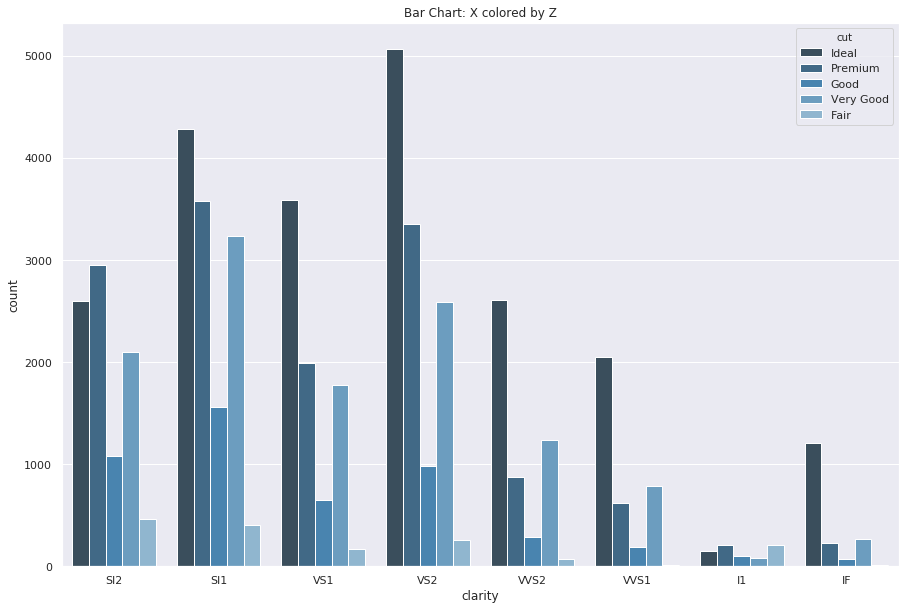

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("diamonds")

p = sns.countplot(x="clarity", 
            hue="cut", 
            palette="Blues_d",
            data=df)

plt.title("Bar Chart: X colored by Z")
plt.show(p)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("diamonds")

p = sns.countplot(x="clarity", 
            hue="cut", 
            palette="Blues_d",
            data=df)

plt.title("Bar Chart: X colored by Z")
plt.show(p)

# Bar Chart (Numbers)

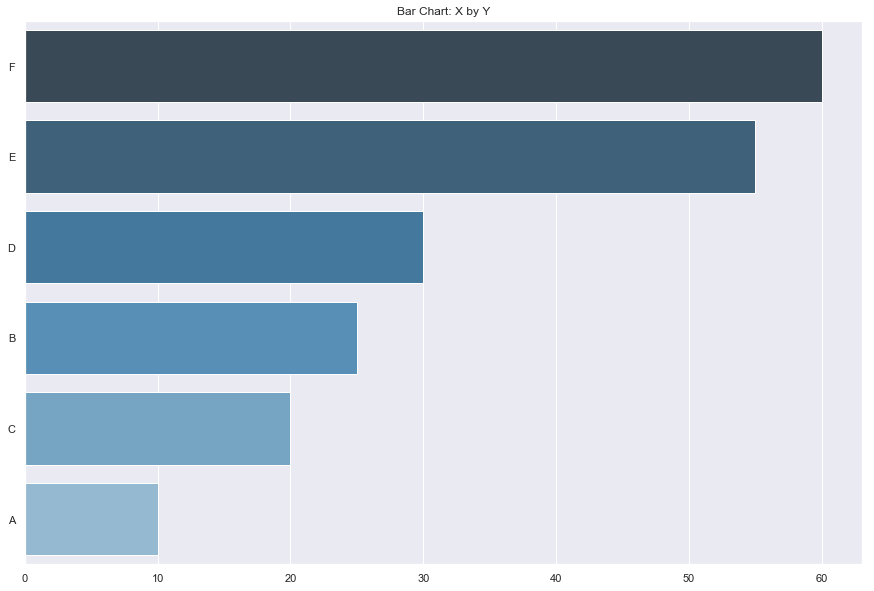

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
plt.rcParams["figure.figsize"] = [15,10]

# Raw Data
a1 = np.array([10, 25, 20, 30, 55, 60])
a2 = np.array(["A", "B", "C", "D", "E", "F"])

# Sorted Data
idx = a1.argsort()
a1 = a1[idx[::-1]]
a2 = a2[idx[::-1]]

# Plot
p = sns.barplot(x=a1, 
                y=a2, 
                palette="Blues_d",
                color="r",
                data=df)

plt.title("Bar Chart: X by Y")
plt.show(p)

# Histogram

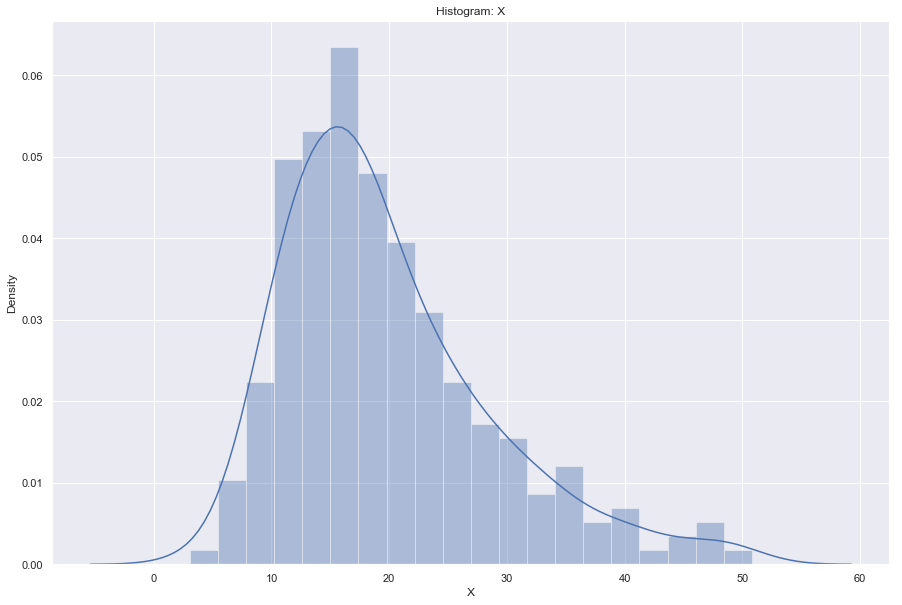

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("tips")

p = sns.distplot(a=df["total_bill"], bins = 20, norm_hist=False)

plt.title("Histogram: X")
plt.ylabel("Density")
plt.xlabel("X")
plt.show(p)

# Density Plot

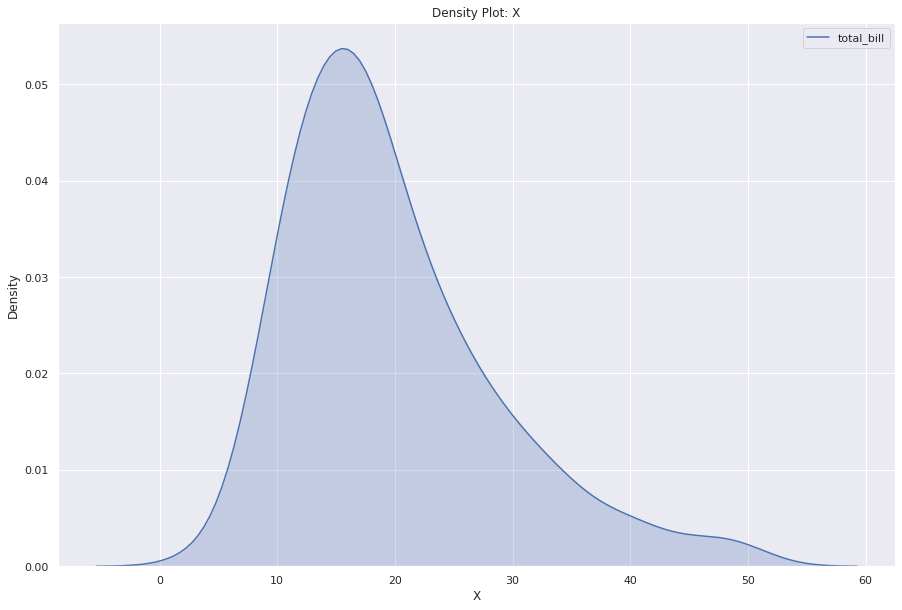

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("tips")

p = sns.kdeplot(data=df["total_bill"], shade=True)

plt.title("Density Plot: X")
plt.ylabel("Density")
plt.xlabel("X")
plt.show(p)

# Two Density Plots

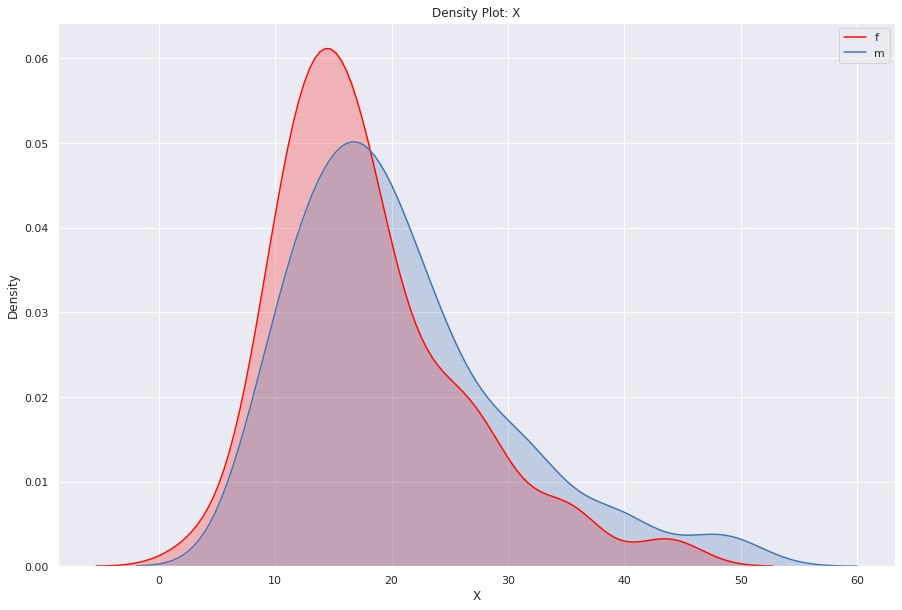

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("tips")

sns.kdeplot(df.loc[df.sex == 'Female'].total_bill, color="#FF0B04", shade = True, label="f");
sns.kdeplot(df.loc[df.sex == 'Male'].total_bill, color="#4374B3", shade = True, label="m");

plt.title("Density Plot: X")
plt.ylabel("Density")
plt.xlabel("X")
plt.show(p)

# Joint Density Plot

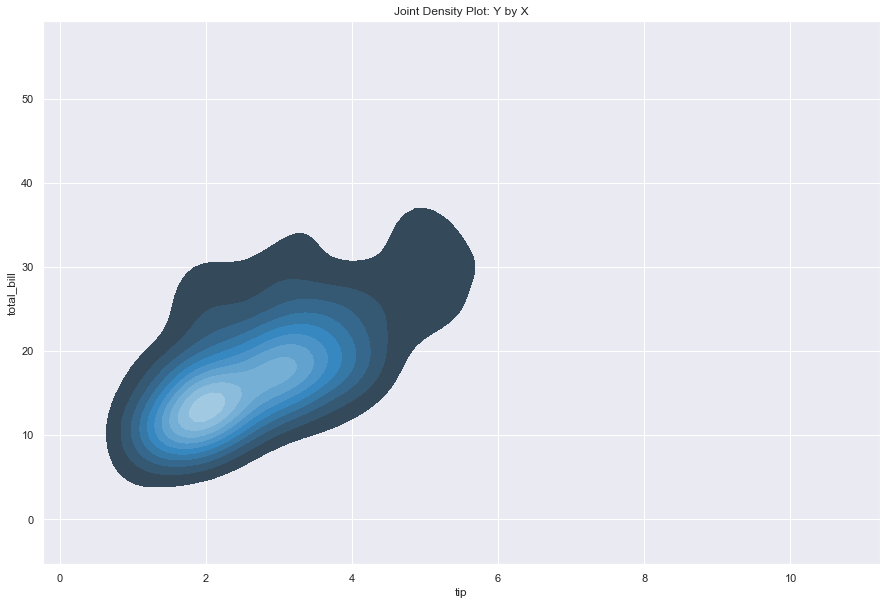

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("tips")

p = sns.kdeplot(df["tip"], df["total_bill"], cmap="Blues_d", shade=True, shade_lowest=False, legend=True)

plt.title("Joint Density Plot: Y by X")
plt.show(p)

# Correlation plot

In [47]:
import matplotlib.colors as mcolors
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('black'), c('white'), 0.5, c('white'), c('darkorange')])

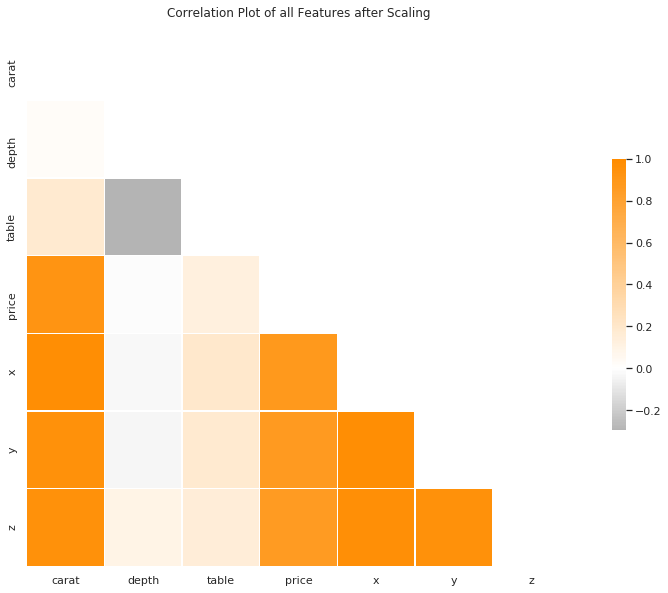

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style(style="white")
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("diamonds").drop(columns = ["cut", "color", "clarity"])

# Generate a large random dataset
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Draw the heatmap with the mask and correct aspect ratio
p = sns.heatmap(corr, mask=mask, cmap = rvb, center=0, #vmax=.3, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
p.set(title = "Correlation Plot of all Features after Scaling");

# Joint Histogram with Scatterplot

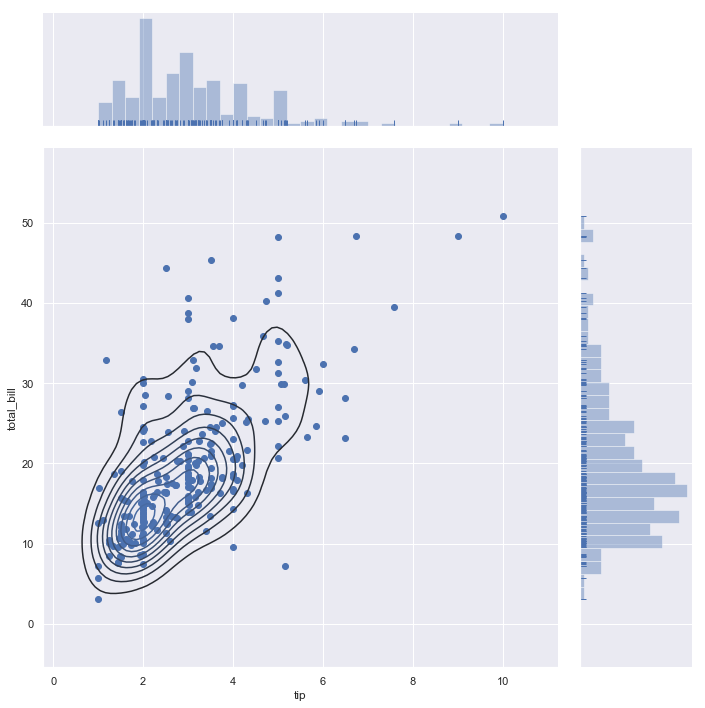

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("tips")

p = sns.jointplot("tip", "total_bill", data=df, height=10, ratio=4, color="b", 
                 marginal_kws=dict(bins=30, rug=True))\
       .plot_joint(sns.kdeplot, color="b")

plt.show(p)

# Heatmap (not scaled)

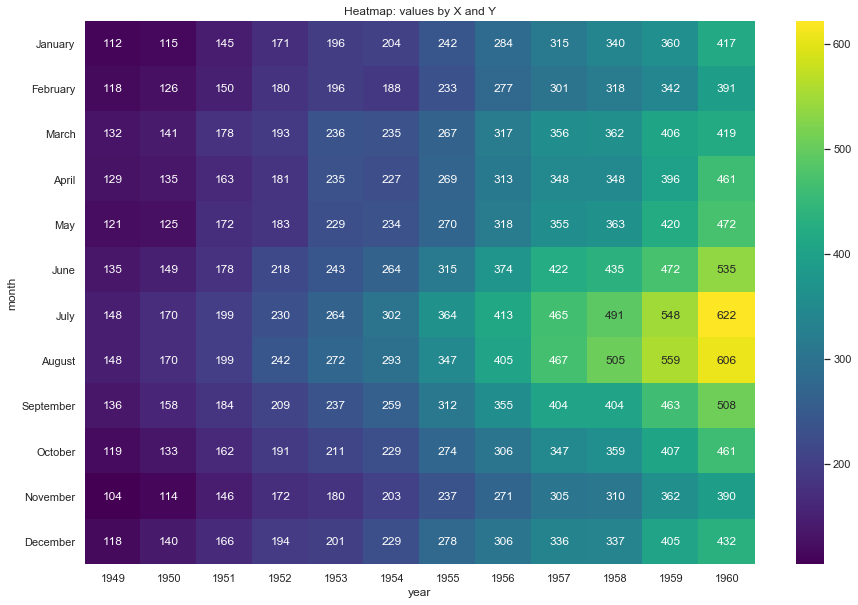

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = [15,10]

df = sns.load_dataset("flights")
df = df.pivot(index = "month", columns = "year", values = "passengers")

p = sns.heatmap(df, annot=True, fmt="d", cmap = "viridis")

plt.title("Heatmap: values by X and Y")
plt.show(p)

# Heatmap (MinMax scaled)

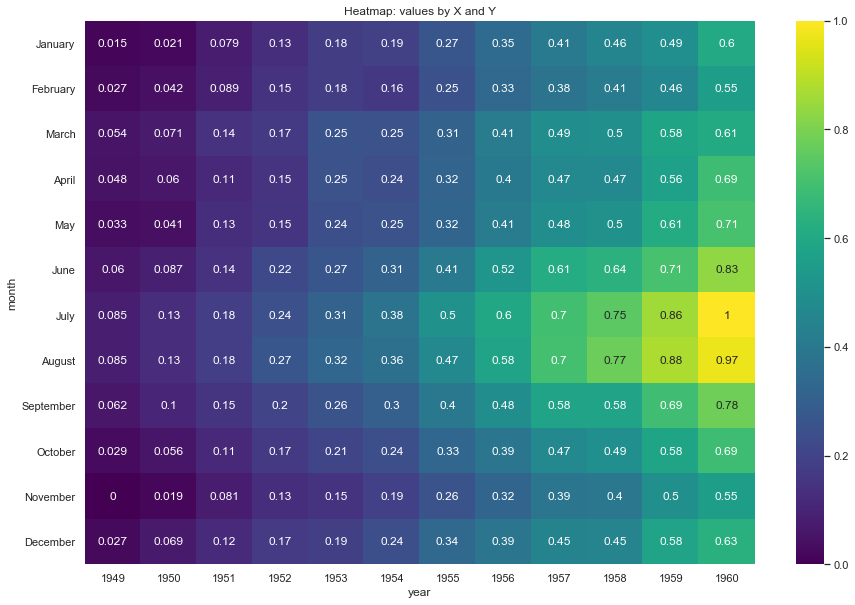

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [15,10]

# Raw Data
df = sns.load_dataset("flights")

# Scaled Data
min_max_scaler = preprocessing.MinMaxScaler()
df["passengers"] = min_max_scaler.fit_transform(df["passengers"].astype(float).values.reshape(-1, 1))

# Pivoted Data
df = df.pivot(index = "month", columns = "year", values = "passengers")

p = sns.heatmap(df, annot=True, cmap = "viridis")

plt.title("Heatmap: values by X and Y")
plt.show(p)

# Heatmap (z-standardized)

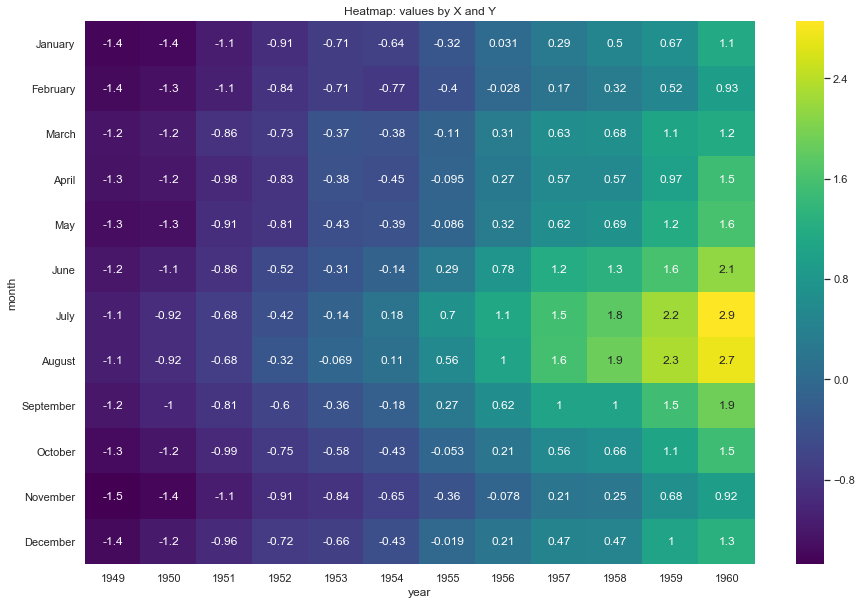

In [194]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [15,10]

# Raw Data
df = sns.load_dataset("flights")

# Scaled Data
standard_scaler = preprocessing.StandardScaler()
df["passengers"] = standard_scaler.fit_transform(df["passengers"].astype(float).values.reshape(-1, 1))

# Pivoted Data
df = df.pivot(index = "month", columns = "year", values = "passengers")

p = sns.heatmap(df, annot=True, cmap = "viridis")

plt.title("Heatmap: values by X and Y")
plt.show(p)